In [1]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

#Quantile regression
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import datetime


In [19]:
#name="sWIG80"
name="mWIG40"

path1 = "D:\!SGH Magisterka\Projekt mentoring\Dane Covid.xlsx"
path2 = "D:\!SGH Magisterka\Projekt mentoring\mwig40_d.csv"
path3 = "D:\!SGH Magisterka\Projekt mentoring\Europe_Brent_Spot_Price_FOB.csv"
df_covid = pd.read_excel(path1)
df_ceny = pd.read_csv(path2)
df_oil = pd.read_csv(path3)

In [20]:
#data cleaning cen indeksu WIG20

df_ceny.drop(columns=["Otwarcie","Najwyzszy","Najnizszy","Wolumen"], inplace=True)
df_ceny["Zamknięcie zmiana %"] = df_ceny["Zamkniecie"].pct_change()
df_ceny["Zamknięcie zmiana %"].replace([np.inf, -np.inf], 0, inplace=True)
df_ceny.dropna(inplace=True)

In [21]:
#data cleaning cen ropy. Póki co jednak dane nie są użyte w modelu

df_oil['Day'] = pd.to_datetime(df_oil.Day)
df_oil['Day'] = df_oil['Day'].dt.strftime('%Y-%m-%d')
df_oil = df_oil.rename(columns={"Europe Brent Spot Price FOB Dollars per Barrel":"$ pro Barrel"}, inplace=False)
df_oil.columns = ["Data" , "$ per barrel"]
df_oil = df_oil.iloc[:530]
df_oil = df_oil.sort_values(by="Data", ascending=True)
df_oil = df_oil.reset_index()
df_oil.drop(columns=["index"], inplace=True)
df_oil["Barrel prc % change"] = df_oil["$ per barrel"].pct_change()
df_oil["Barrel prc % change"].replace([np.inf, -np.inf], 0, inplace=True)
df_oil.dropna(inplace=True)

In [22]:
#data cleaning danych covid

df_covid = df_covid[["date","new_cases"]]
pd.to_datetime(df_covid["date"])
df_covid["new cases % change"] = df_covid["new_cases"].pct_change()
df_covid["new cases % change"].replace([np.inf, -np.inf], None, inplace=True)
df_covid.dropna(inplace=True)
df_covid.rename(columns={"date":"Data"},inplace=True)

In [23]:
#przygotowujemy zmergowany dataset

df_merged1 = df_ceny.merge(df_covid, how="inner",on="Data")
df_merged = df_merged1.merge(df_oil, how="inner",on="Data")

In [24]:
df_merged

,Data,Zamkniecie,Zamknięcie zmiana %,new_cases,new cases % change,$ per barrel,Barrel prc % change
0,2020-03-05,3690.89,-0.006827,0,-1.000000,51.29,-0.010991
1,2020-03-06,3610.61,-0.021751,4,-1.000000,45.60,-0.110938
2,2020-03-09,3385.71,-0.062289,5,-0.166667,35.33,-0.225219
3,2020-03-10,3348.64,-0.010949,6,0.200000,35.57,0.006793
4,2020-03-11,3194.01,-0.046177,9,0.500000,34.45,-0.031487
...,...,...,...,...,...,...,...
498,2022-03-09,4368.06,0.048530,14440,0.095932,116.58,-0.124643
499,2022-03-10,4340.29,-0.006358,13425,-0.070291,114.54,-0.017499
500,2022-03-11,4387.18,0.010803,11633,-0.133482,118.11,0.031168
501,2022-03-14,4375.39,-0.002687,5295,-0.301267,110.39,-0.065363


In [25]:
df_merged["Zamkniecie"].min()

2769.14

In [26]:
df_merged.describe()

,Zamkniecie,Zamknięcie zmiana %,new_cases,new cases % change,$ per barrel,Barrel prc % change
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,4317.701829,0.000362,7885.759443,0.145697,60.204851,0.002868
std,801.782594,0.015713,10706.219704,0.527871,21.853376,0.052024
min,2769.140000,-0.119189,0.000000,-1.000000,9.120000,-0.474654
25%,3613.625000,-0.005791,359.000000,-0.107194,42.445000,-0.011051
50%,4338.750000,0.001171,2292.000000,0.036270,63.890000,0.004318
75%,5040.970000,0.007615,12872.500000,0.335612,74.735000,0.017122
max,5853.870000,0.074181,57659.000000,7.000000,133.180000,0.509868


'\nsns.histplot(data=df_merged["Zamknięcie zmiana %"], ax=axes[1], kde=True)\naxes[1].set_title("Liczebność w grupach")\n\nfig.tight_layout()\n\n'

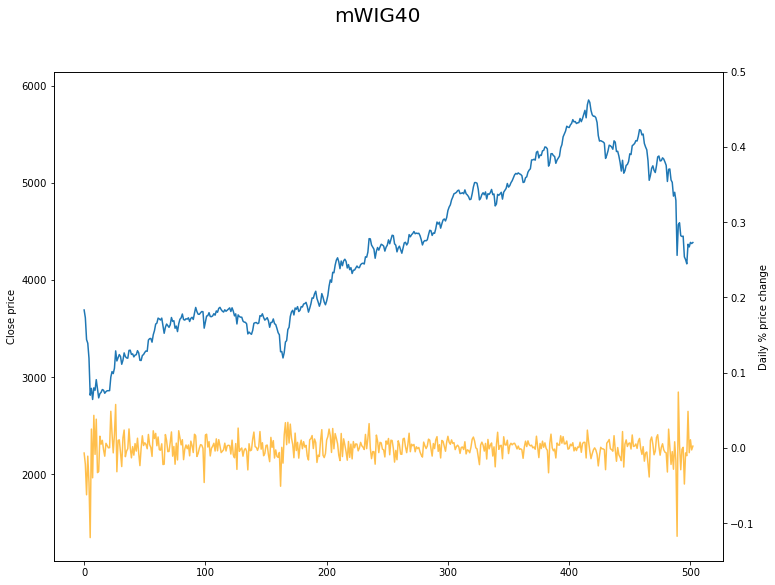

In [27]:
fig, axes = plt.subplots( figsize=(12,9))
fig.suptitle("{}".format(name), fontsize=20)

bottom_lim = df_merged["Zamkniecie"].min()*0.4
top_lim = df_merged["Zamkniecie"].max()*1.05
 
axes.plot(df_merged["Zamkniecie"])
axes.set_ylim(bottom = bottom_lim, top=top_lim)
axes.set_ylabel('Close price')

ax2=axes.twinx()
ax2.plot(df_merged["Zamknięcie zmiana %"], color="orange", alpha=.7)
ax2.set_ylim(bottom=-0.15, top=0.5)
ax2.set_ylabel('Daily % price change')

fname= name+str("-1")+".png"
plt.savefig(fname, format="png")

"""
sns.histplot(data=df_merged["Zamknięcie zmiana %"], ax=axes[1], kde=True)
axes[1].set_title("Liczebność w grupach")

fig.tight_layout()

"""

In [28]:
close_chng = df_merged["Zamknięcie zmiana %"]
cases_chng = df_merged["new cases % change"]

In [29]:
def quant_reg(df_merged):     #funkcja obliczająca współczynniki regresji dla kilku kwantyli naraz 
    
    nachylenie=[]
    wyraz_wolny=[]
    ub=[]
    lb=[]
    kwantyle =[0.05, 0.1 , 0.25 , 0.5 , 0.75, 0.9 , 0.95]
    
    for q in kwantyle:
        my_model = smf.quantreg('close_chng ~ cases_chng', df_merged).fit(q)
        nachylenie.append(my_model.params["cases_chng"])
        wyraz_wolny.append(my_model.params["Intercept"])
        ub.append(my_model.conf_int().loc["cases_chng"][0])    #górna granica przedziału ufności
        lb.append(my_model.conf_int().loc["cases_chng"][1])    #dolna granica przedziału ufności
        
    dict={"m": nachylenie, "c": wyraz_wolny, "ub": ub, "lb":lb}
    df_model = pd.DataFrame(dict, index=kwantyle)
    return df_model





def quant_reg_plot(df_merged):          #funkcja plottująca wykres regresji kwantylowej dla kilku kwantyli naraz 
    df_model = quant_reg(df_merged)
    fig, ax = plt.subplots(figsize=(10, 10))
    
    #plotowanie scatter  
    ax.scatter(x=df_merged["new cases % change"], y=df_merged["Zamknięcie zmiana %"],)
    
    #dla każdego rzędu splotuj jedną linie regresji modelu
    
    x= np.linspace(-1,7,10)
    for i in range(0,len(df_model)):
        y= (df_model.iloc[i][0]*x+df_model.iloc[i][1])
        
        if df_model.index[i] ==0.50:
            ax.plot(x, y, color="green",linestyle="dashed", alpha=0.9)
        else:
            ax.plot(x, y, color="black",linestyle="dashed", alpha=0.6)
        
    plt.title("Quantile regression", fontdict={"fontsize": 20})
    ax.set_xlabel("Daily COVID cases % change")
    ax.set_ylabel("Daily {} returns % change".format(name))
    
    fname= name+str("-2")+".png"
    plt.savefig(fname, format="png")

    return plt.show()

In [30]:
df_model = quant_reg(df_merged)
df_model

,m,c,ub,lb
0.05,-0.000633,-0.022382,-0.011846,0.010579
0.10,-0.003516,-0.013995,-0.007571,0.000539
0.25,-0.000642,-0.005683,-0.003408,0.002124
0.50,0.000660,0.001051,-0.001421,0.002740
0.75,0.002349,0.007679,-0.000703,0.005401
0.90,0.003369,0.014570,-0.003392,0.010131
0.95,0.003800,0.019844,0.000769,0.006830


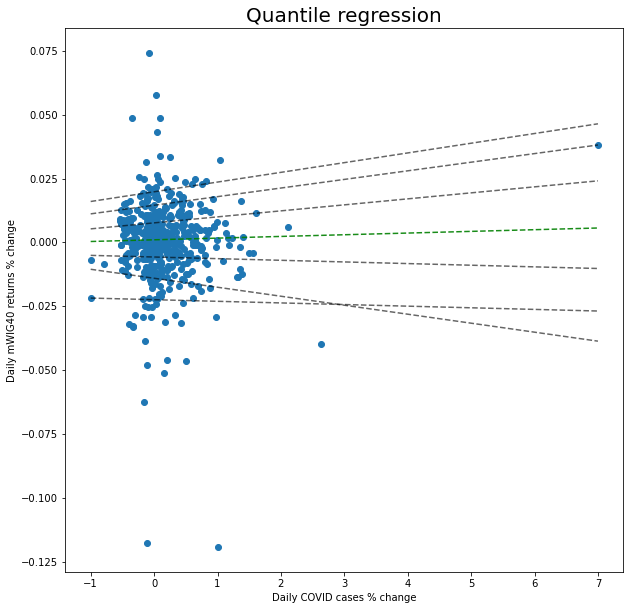

In [31]:
quant_reg_plot(df_merged)

In [32]:
my_model = smf.quantreg('close_chng ~ cases_chng', df_merged).fit(0.5)     #regresja kwantylowa dla mediany - podsumowanie
my_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:             close_chng   Pseudo R-squared:            0.0005230
Model:                       QuantReg   Bandwidth:                    0.006282
Method:                 Least Squares   Sparsity:                      0.02505
Date:                Mon, 18 Apr 2022   No. Observations:                  503
Time:                        21:28:37   Df Residuals:                      501
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.001      1.814      0.070   -8.74e-05       0.002
cases_chng     0.0007      0.001      0.623      0.534      -0.001       0.003
==============================================================================
"""

In [33]:
#dla porównania model z regresją liniową 

model_ols = smf.ols('close_chng ~ cases_chng', df_merged).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             close_chng   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3398
Date:                Mon, 18 Apr 2022   Prob (F-statistic):              0.560
Time:                        21:28:37   Log-Likelihood:                 1376.0
No. Observations:                 503   AIC:                            -2748.
Df Residuals:                     501   BIC:                            -2740.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.001      0.343      0.732      -0.001       0.002
cases_chng     0.0008      0.001      0.583      0.560      -0.002       0.003
==============================================================================
Omnibus:                      249.553   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4524.229
Skew:                          -1.709   Prob(JB):                         0.00
Kurtosis:                      17.289   Cond. No.                         1.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Daily mWIG40 returns % change')

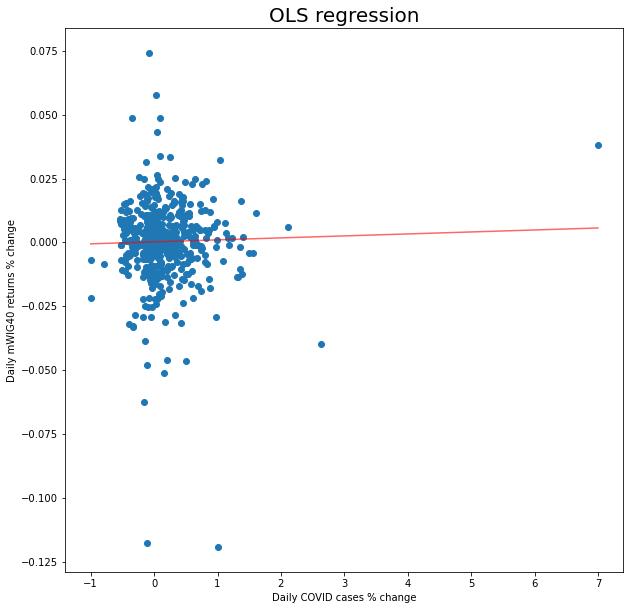

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=df_merged["new cases % change"], y=df_merged["Zamknięcie zmiana %"],)


x= np.linspace(-1,7,10)
y= (model_ols.params["cases_chng"]*x+model_ols.params["Intercept"])
ax.plot(x, y, color="red", alpha=0.6)

plt.title("OLS regression", fontdict={"fontsize": 20})
ax.set_xlabel("Daily COVID cases % change")
ax.set_ylabel("Daily {} returns % change".format(name))

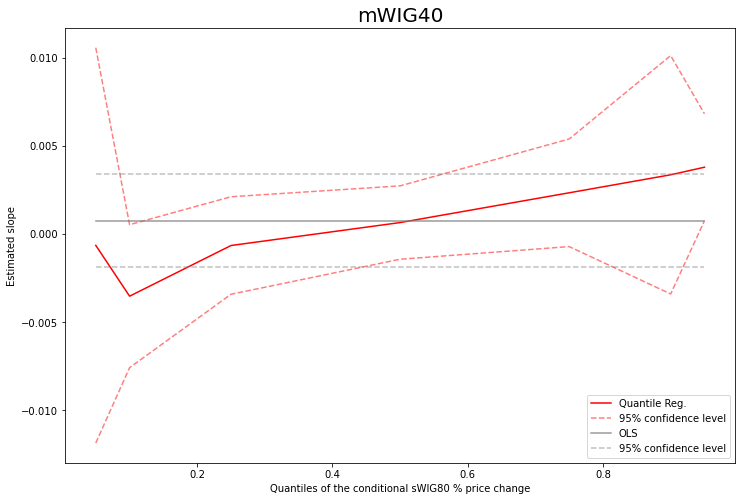

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
plot1 = plt.plot(df_model.index, df_model.m, color="red", label="Quantile Reg.")
upper_bound = plt.plot(df_model.index, df_model.ub, color="red", linestyle="dashed", label="95% confidence level", alpha=0.5)
lower_bound = plt.plot(df_model.index, df_model.lb, color="red", linestyle="dashed", alpha=0.5)

plot2 = plt.plot(df_model.index, [model_ols.params["cases_chng"]]*7, color="grey", label="OLS", alpha=0.8)

upper_bound = plt.plot(df_model.index, [model_ols.conf_int().loc["cases_chng"][0]]*7, color="grey", 
                       linestyle="dashed", label="95% confidence level", alpha=0.5)

lower_bound = plt.plot(df_model.index, [model_ols.conf_int().loc["cases_chng"][1]]*7, color="grey",
                       linestyle="dashed", alpha=0.5)

plt.xlabel("Quantiles of the conditional sWIG80 % price change")
plt.ylabel("Estimated slope")
plt.title("{}".format(name), fontdict={"fontsize": 20})

plt.legend()

fname= name+str("-3")+".png"
plt.savefig(fname, format="png")

plt.show()